# Introduction to Logistic Regression

### The following topics are discussed in this notebook:
* Logistic regression background
* Performing logistic regression using scikit-learn.
* Using logistic regression to perform multiclass classification.

### Additional Resources
* [Hands-On Machine Learning, Ch 4](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)
* [Introduction to Statistical Learning, Section 4.3](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from ClassificationPlotter import plot_regions

# Logistic Regresion

Logistic regression is a probabilistic linear classification method that can be used to estimate the probability that an observation belongs to a particular class based on the feature values. Logistic regression can be adapted for use in multi-class classification problems, but we will begin by discussing the standard version of the algorithm, which is a binary classifier. 

We will introduce this concept with an example.

# Example 1: Exam Preparation

Assume that students in a certain field have to take a professional exam. We wish to determine the effect that time spent studying has on a students chances of passing the exam. We collect a dataset consisting of 6 students. For each student, we have the following pieces of information:

* $X^{(1)}$ - The number of hours the student spent studying alone. 

* $X^{(2)}$ - The number of hours the student spent in an exam preparation seminar. 

* $Y$ - The results of the test. The result is recorded as 'F' if the student failed and 'P' if the student passed. 


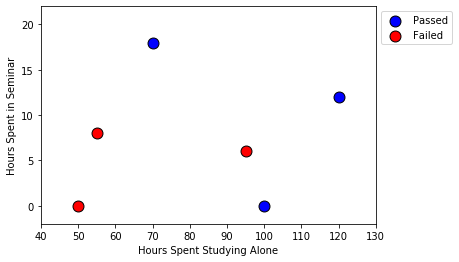

In [2]:
X = np.array([[50, 55, 70, 95, 100, 120], 
              [0, 8, 18, 6, 0, 12]]).T
y = np.array(['F', 'F', 'P', 'F', 'P', 'P'])

plt.figure(figsize=[6,4])
plt.scatter(X[y=='P',0], X[y=='P',1], s=120, 
            c='b', edgecolors='k', label='Passed')
plt.scatter(X[y=='F',0], X[y=='F',1], s=120, 
            c='r', edgecolors='k', label='Failed')

plt.xlabel('Hours Spent Studying Alone')
plt.ylabel('Hours Spent in Seminar')

plt.xlim([40,130])
plt.ylim([-2,22])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


We wish to build a model that will allow us to make predictions about the likelihood that a person will pass this exam given the amount of time that they spent studying alone, as well as the amount of time that they spent in an exam preparation seminar. 

Assume that a particular individual has studied for $x^{(1)}$ hours on their own, and $x^{(2)}$ hours in a seminar. Let $p$ denote the probability that this individual will pass the exam. In other words: 
$\large p = P \left[Y = Passed ~|~ X^{(1)} = x^{(1)} \text{ and } X^{(2)} = x^{(2)} \right]$

Consider a model of the form: $\large p = b_0 + b_1 \cdot x^{(1)} + b_2 \cdot x^{(2)}$

What issues might we have in trying to use such a model to estimate a probability?

# The Sigmoid Function

The **sigmoid** or **logistic** function is given by the following formula:

$\Large \sigma(z) = \frac{e^z}{1+e^z} = \frac{1}{1 + e^{-z}}$

A plot of the sigmoid function is shown below.

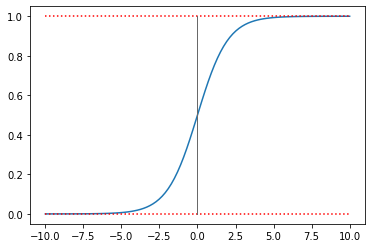

In [3]:
z = np.linspace(-10,10,100)
w = 1 / (1 + np.exp(-z))

plt.close()
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(z,w)
plt.plot([-10,10],[1,1], linestyle=':', c="r")
plt.plot([-10,10],[0,0], linestyle=':', c="r")
plt.plot([0,0],[0,1], linewidth=1, c="dimgray")
plt.show()

# The Logistic Regression Model

Since the output of the sigmoid function is always between 0 and 1, it can be used in models that attempt to estimate probabilities. A **logistic regression** model is constructed by taking a linear combination of the inputs and then passing the result into a sigmoid function. In detail:

* Given $x^{(1)}$ and $x^{(2)}$, let $\large p = P \left[Y = Passed ~|~ X^{(1)} = x^{(1)} \text{ and } X^{(2)} = x^{(2)} \right]$.


* Let $\large z = b_0 + b_1 \cdot x^{(1)} + b_2 \cdot x^{(2)}$


* Let $\large p = \sigma(z)  = \frac{1}{1 + e^{-z}}$

Thus, when using logistic regession, we assume that the probability $p$ of an individual passing their exam follows a model of the form: $\enspace \Large p = \frac {1} {
1 + e^{-\left(b_0 ~+~ b_1 \cdot x^{(1)} ~+~ b_2 \cdot  x^{(2)}\right)}
}$


# Generating Predictions

For the sake of discussion, assume that we are considering a model of the following form:

$\Large z = -2.4 + 0.016  x^{(1)} + 0.1 x^{(2)}$

$\Large p = \frac {1} {1 + e^{-z}}$

Let's use this model to estimate the probability that an individual will pass their exam, assuming that $x^{(1)} = 120$ and $x^{(2)} = 12$.

Plugging the predictors into the model, we get:

In [4]:
z = -2.4 + 0.016 * 120 + 0.1 * 12
print(z)

0.7200000000000002


In [5]:
p = 1 / (1 + np.exp(-z))

print(p)

0.6726070170677605


Thus, our model estimates a probability of 0.6726 that this student would pass their exam. Note that there is, in fact, such an individual in our dataset, and they did pass their exam. 

# Decision Boundaries

When using our model to predict the outcome of an exam, we will predict that a student will pass their exam if our model estimates $p \geq 0.5$, and that the student will fail their exam if the model estimates $p < 0.5$. The set of points where $p = 0.5$ will thus form a boundary between the individuals for which we would predict different results. We can show that this boundary will always be linear:

* $\large p = 0.5$


* $\large \frac {1} {1 + e^{-z}} = 0.5$


* $\large {1 + e^{-z}} = 2$


* $\large {e^{-z}} = 1$


* $\large z = 0$


* $\large\beta_0 + \beta_1 \cdot x^{(1)} ~+~ \beta_2 \cdot  x^{(2)} = 0$

The decion boundary for the model we are considering is shown below.

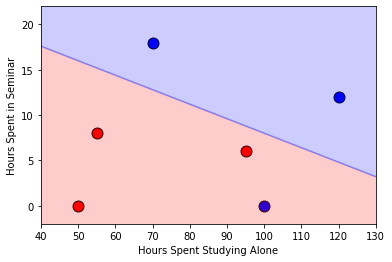

In [6]:
%run -i snippets/snippet04.py

# Comparing Models

We now turn our attention to the question of how to select the best parameter values $b_0$, $b_1$, and $b_2$ for our logistic regression model. The model that we have been considering up to this point was selected arbitrarily, without any consideration of the actual data that we had collected. We would like to find a model that is, in some sense, optimal with respect to the data we have observed. To accomplish that goal, we need to have a means of comparing various models. To that end, consider the following two models:

* **Model 1:** $\Large p = \frac {1} {1 + e^{2.4 ~-~ 0.016  x^{(1)} ~-~ 0.1 x^{(2)}}}$


* **Model 2:** $\Large p = \frac {1} {1 + e^{4.5 ~-~ 0.005  x^{(1)} ~-~ 0.1 x^{(2)}}}$

The decision boundaries for these two models are shown below. 

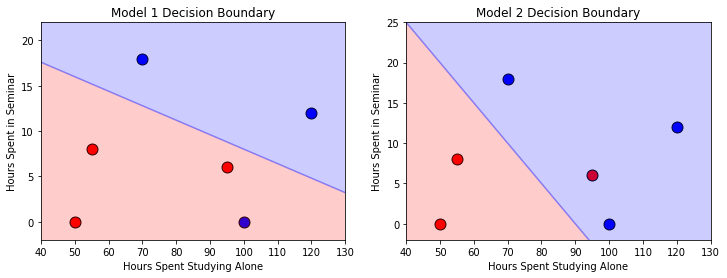

In [7]:
%run -i snippets/snippet05.py

One could reasonably make an argument for either one of these two models over the other. We need a way of quantitatively scoring the two models. Such a scoring method is provided by the model's likelihood score. 

# Likelihood

For each model, we will assign a value called the **likelihood** of the model. This score will be equal to the model's estimate for the probability that the labels in our dataset will be exactly as we have observed. Formally:

* Consider a proposed logistic regression model of the form $\Large p = \frac {1} {1 + e^{
-\left({b}_0 ~+~ {b}_1 \cdot x^{(1)} ~+~ {b}_2 \cdot x^{(2)}\right)}}$


* For each training observation, calculate $p_i$, and then define $\pi_i$ as follows: $
\pi_i = \left\{
        \begin{array}{ll}
            p_i & \text{if  } y_i = \text{P} \\
            1 - p_i & \text{if  } ~y_i = \text{F}
        \end{array}
    \right.$
    
    
* Then $\pi_i$ is the model's estimate for the probability that observation $i$ falls into its actual observed class. 


* Define the model's likelihood score by $L = \pi_1 \cdot \pi_2 \cdot ... \cdot \pi_n = \prod_{i=1}^{n} \pi_i$.


We wish to select a model that maximizes this likelihood score. 

The likelihood scores for the two models define previously are shown below. 

In [8]:
%run -i snippets/snippet06.py

Of the two models, Model 2 has the higher likelihood score, and is thus the preferred model. However, we would like to select the best of all possible models, not simply the best of these two.  

# Creating a Logistic Regression Model with Scikit-Learn

We now create an instance of the `LogisticRegression` class from `sklearn` and then fit it to our observed data. We will then print the values of the model parameters that result in the maximum likelihood score.

In [9]:
model = LogisticRegression(solver='lbfgs', penalty='none')
model.fit(X, y)

print('Intercept:   ',  model.intercept_)
print('Coefficients:', model.coef_)


Intercept:    [-9.25848692]
Coefficients: [[0.09225878 0.21477704]]


Thus, our optimal model has the following form:

$$\Large p = \frac {1} 
{1 + e^{9.2585 ~-~ 0.0923 x^{(1)} ~-~ 0.2148 x^{(2)}}}$$

The decision boundary for this model is displayed below. 


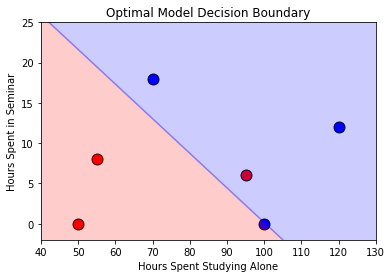

In [10]:
%run -i snippets/snippet07.py

# Generating Predictions

An instance of the `LogisticRegression` class comes equipped with a `predict()` method that can be used to generate predictions for the class that observations will fall into, as well as a `predict_proba()` method that generates for each observation a probability distribution over the possible classes. 

In [11]:
pred = model.predict(X)
print(pred)

['F' 'F' 'P' 'P' 'F' 'P']


In [12]:
proba = model.predict_proba(X)
print(proba)

[[0.9904871  0.0095129 ]
 [0.92172637 0.07827363]
 [0.25623799 0.74376201]
 [0.31114763 0.68885237]
 [0.50815149 0.49184851]
 [0.01225015 0.98774985]]


We can use these methods to generate predictions for new observations that were not part of our original dataset. 

In [13]:
Xnew = [[80, 20], [70, 10]]

print(model.predict(Xnew), '\n')

print(model.predict_proba(Xnew))


['P' 'F'] 

[[0.08182867 0.91817133]
 [0.65759655 0.34240345]]


Let's use the probability estimates generated for our original data to calculate the model's likelihood score. 

In [14]:
pi = np.where(y == 'P', proba[:,1], proba[:,0])
L = np.product(pi)

print(L)

0.10264307590705474


Each instance of `LogisticRegression` also comes equipped with a `score()` method that calculates the model's accuracy, or in other words, the proportion of predictions that it gets correct. 

In [15]:
acc = model.score(X, y)

print(acc)

0.6666666666666666


# Technical Detail: Negative Log-Likelihood

When performing mathematical derivations related to a logistic regression model, or when writing code to implement such a model, it is typical to work with the natural logarithm of the likelihood score, called **log-likilihood**, rather than the actual likelihood score. The log-likelihood is defined as follows:

* Consider a proposed logistic regression model of the form $\Large p = \frac {1} {1 + e^{
-\left({b}_0 ~+~ {b}_1 \cdot x^{(1)} ~+~ {b}_2 \cdot x^{(2)}\right)}}$.


* For each training observation, calculate $p_i$, and then $\pi_i$ as follows: $
\pi_i = \left\{
        \begin{array}{ll}
            p_i & \text{if  } y_i = \text{P} \\
            1 - p_i & \text{if  } ~y_i = \text{F}
        \end{array}
    \right.$


* The likelihood score is given by: $L = \pi_1 \cdot \pi_2 \cdot ... \cdot \pi_n = \prod_{i=1}^{n} \pi_i$.


* The log-likelihood score is defined as: $LL = \ln(L) = \ln(\pi_1) + \ln(\pi_2) + ... + \ln(\pi_n) = \sum_{i=1}^n \ln(\pi_i)$.

Since the natural logarithm is an increasing function, maximizing the log-likelihood is equivalent to maximizing the likelihood. 

In machine learning, it is common practice to score models using **loss functions**. A loss function is a scoring method that we wish to minimize. Since our goal is to maximize log-likelihood, it is not a loss function. However, its negative is. Thus, we can define a loss function for logistic regression models as follows:

* The **negative log-likelihood** score is defined as: $NLL = -\ln(L) = -\sum_{i=1}^n \ln(\pi_i)$.


# Example 2: Census Data

In [16]:
census = pd.read_csv('data/census.txt', sep='\t')
census.head(10)

,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Identifying Categorical Features, Numerical Features, and Labels

In [17]:
X_num = census.iloc[:,[0,2,4,10,11,12]]
X_cat = census.iloc[:,[1,3,5,6,7,8,9,13]]
y_cen = census.iloc[:,14]

print(X_num.shape)
print(X_cat.shape)
print(y_cen.shape)

(32561, 6)
(32561, 8)
(32561,)


### One-Hot Encoding of Categorical Variables

We will apply one-hot encoding to the categorical variables.

In [18]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_cat)
X_enc = encoder.transform(X_cat)

print(X_enc.shape)

(32561, 102)


### Splitting the Data

We will create an 80/20 split of our data into training and test tests.

In [19]:
X_enc_train, X_enc_test, y_train, y_test =\
    train_test_split(X_enc, y_cen, test_size = 0.2, random_state=1, stratify=y_cen)

print(X_enc_train.shape)
print(X_enc_test.shape)

(26048, 102)
(6513, 102)


In [20]:
X_num_train, X_num_test, y_train, y_test =\
    train_test_split(X_num, y_cen, test_size = 0.2, random_state=1, stratify=y_cen)

print(X_num_train.shape)
print(X_num_test.shape)

(26048, 6)
(6513, 6)


### Scaling Numerical Features.

We will now apply min-max scaling to the numerical features.

In [21]:
scaler = MinMaxScaler()
X_mm_train = scaler.fit_transform(X_num_train.astype('float'))
X_mm_test = scaler.transform(X_num_test.astype('float'))

print(X_mm_train.shape)
print(X_mm_test.shape)

(26048, 6)
(6513, 6)


### Recombining Feature Arrays

We have completed the desired encoding and scaling of features. We must now combine the encoded categorical features with the scaled numerical features. We will need to do this for both the training set and the test set. 

In [22]:
X_train = np.hstack([X_enc_train, X_mm_train])
X_test = np.hstack([X_enc_test, X_mm_test])

print(X_train.shape)
print(X_test.shape)

(26048, 108)
(6513, 108)


### Constructing the Model

In [23]:
cen_model = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='none')
cen_model.fit(X_train, y_train)

print('Training Accuracy:  ', cen_model.score(X_train, y_train))
print('Test  Accuracy:     ', cen_model.score(X_test, y_test))

Training Accuracy:   0.8542690417690417
Test  Accuracy:      0.8489175495163519


## Classification Metrics

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
pred_test = cen_model.predict(X_test)

cm = confusion_matrix(y_test, pred_test)

cm_df = pd.DataFrame(cm, columns=['<=50K (Pred)', '>50K (Pred)'], index=['<=50K (True)', '>50K (True)'])
cm_df

,<=50K (Pred),>50K (Pred)
<=50K (True),4586,359
>50K (True),625,943


In [26]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4945
        >50K       0.72      0.60      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



# Multiclass Classification with Logistic Regression

Assume that we wish to create a classification model for use in a task in which there are 3 or more classes. In particular, assume that there are `M` predictors and that our labels each fall into one of `K` classes, where `K` is greater than 2. In this case, the standard version of logistic regression will not work, as it can only perform binary classification. There are, however, multiple ways of adapting logistic regression to perfom multiclass classification. We will present one such method here. 

* For each $k = 1, 2, ..., K$, select parameters $b_{k,0}, b_{k,1}, b_{k,2}, ..., b_{k,M}$.


* For each $k = 1, 2, ..., K$, let $\large z^{(k)} = b_{k,0} + b_{k,1} \cdot x^{(1)} + b_{k,2} \cdot x^{(2)} + ... +  b_{k,M} \cdot x^{(M)}$ 


* For each observation, and each class, define $\Large p_i^{(k)} = \frac{e^{Z^{(k)}}}{ \sum_{j=1}^K e^{Z^{(j)}} }$


* The values $\large p_i^{(1)}, p_i^{(2)}, ..., p_i^{(K)}$ form a probability distribution over the possible classes. 


* We let $\pi_i$ to be equal to the $p_k$ associated with the correct level of observation `i`. 


* As with the standard version of logistic regression, our goal is to maximize the log-likelihood $LL = \sum_{i=1}^n \ln(\pi_i)$, or equivalently, minimize the negative log-likelihood $NLL$. 

# Example 3: Sythentic Dataset with Four Classes

In [27]:
from sklearn.datasets import make_classification

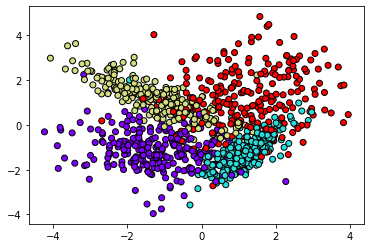

In [28]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_classes=4, n_clusters_per_class=1,
                           class_sep=1.2, random_state=1)

plt.figure(figsize=[6,4])
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='rainbow')
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 2)
(800,)
(200, 2)
(200,)


In [30]:
mc_model = LogisticRegression(solver='lbfgs', C=10e99, multi_class='multinomial')
mc_model.fit(X_train, y_train)

print('Training Accuracy:  ', mc_model.score(X_train, y_train))
print('Validation Accuracy:', mc_model.score(X_test, y_test))

Training Accuracy:   0.82125
Validation Accuracy: 0.83


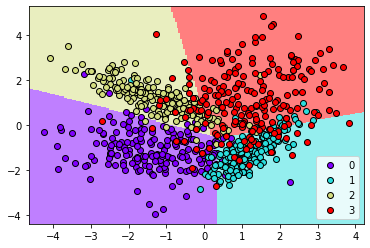

In [31]:
plot_regions(mc_model, X_train, y_train, num_ticks=200)

In [32]:
pred_test = mc_model.predict(X_test)

cm = confusion_matrix(y_test, pred_test)

cm_df = pd.DataFrame(cm)
cm_df

,0,1,2,3
0,45,1,3,1
1,4,43,0,2
2,0,2,42,6
3,2,9,4,36


In [33]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.78      0.88      0.83        49
           2       0.86      0.84      0.85        50
           3       0.80      0.71      0.75        51

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

